# **Inequality and growth**

In this project, I examine the evolution of the Gini coefficient in different countries, to then compare Gini coefficients and GDP per capita data in these same countries. I use data from the World Bank up to 2023, and base my analysis on the methods and procedures explained in Lecture 6 of "A First Course in Quantitative Economics with Python" by QuantEcon.

__Name__: Jorge Pineño

__LinkedIn__: www.linkedin.com/in/jorge-p-6118ba31b

## Resources used:

__World Bank GDP per capita data:__ https://data.worldbank.org/indicator/NY.GDP.PCAP.KD

__World Bank Gini coefficient data:__ https://data.worldbank.org/indicator/SI.POV.GINI

__QuantEcon Lecture:__ https://intro.quantecon.org/inequality.html

In [110]:
# imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import wbgapi as wb
import plotly.express as px

# **Gini coefficient**:

In [113]:
# fetch Gini coefficient data for all countries from the World Bank:
gini_all = wb.data.DataFrame("SI.POV.GINI")
# remove 'YR' in index and convert to integer:
gini_all.columns = gini_all.columns.map(lambda x: int(x.replace('YR','')))
# create a long series with a multi-index of the data:
gini_all = gini_all.unstack(level='economy').dropna()
gini_all

      economy
1963  USA        37.6
1964  USA        38.1
1965  USA        37.5
1966  USA        37.8
1967  USA        36.9
                 ... 
2022  ZMB        51.5
2023  CRI        46.7
      ECU        44.6
      IDN        36.1
      PAN        48.9
Length: 2111, dtype: float64

In [114]:
# unstack data to get countries as columns:
gini = gini_all.unstack()
gini

economy,USA,GBR,FRA,CAN,SWE,IND,ITA,ISR,NOR,PAN,...,ARE,SYC,RUS,LCA,MMR,QAT,TUR,GRD,MHL,SUR
1963,37.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,38.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,37.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966,37.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,36.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,41.5,32.8,31.2,31.7,29.3,33.8,34.6,38.3,27.7,49.8,...,NaN,NaN,35.7,NaN,NaN,NaN,43.8,NaN,35.5,NaN
2020,39.7,32.6,30.7,NaN,28.9,33.8,35.2,37.8,NaN,NaN,...,NaN,NaN,33.7,NaN,NaN,NaN,43.0,NaN,NaN,NaN
2021,39.7,32.4,31.5,NaN,29.8,32.8,34.8,37.9,NaN,50.9,...,NaN,NaN,35.1,NaN,NaN,NaN,44.4,NaN,NaN,NaN
2022,41.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.2


In [115]:
# check countries included:
gini.columns

Index(['USA', 'GBR', 'FRA', 'CAN', 'SWE', 'IND', 'ITA', 'ISR', 'NOR', 'PAN',
       ...
       'ARE', 'SYC', 'RUS', 'LCA', 'MMR', 'QAT', 'TUR', 'GRD', 'MHL', 'SUR'],
      dtype='object', name='economy', length=169)

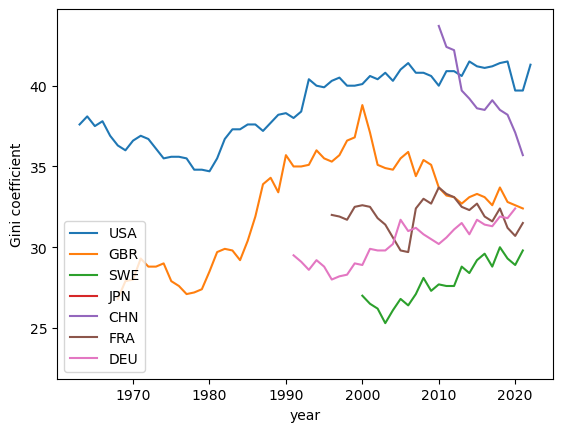

In [116]:
# compare data for the USA, the UK, Sweden, Japan, China, France, and Germany:
ax = gini[['USA','GBR', 'SWE', 'JPN', 'CHN', 'FRA', 'DEU']].plot()
ax.set_xlabel('year')
ax.set_ylabel('Gini coefficient')
ax.legend(title="")
plt.show()

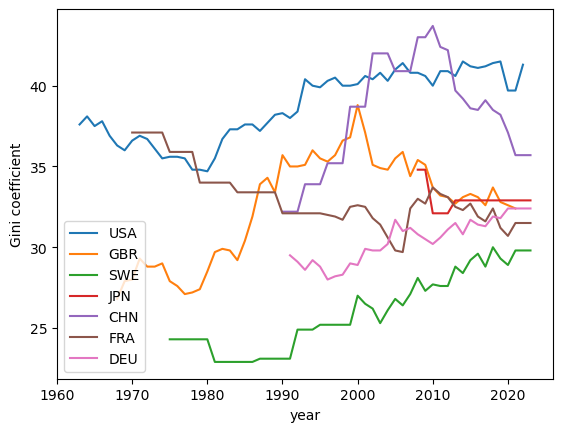

In [117]:
# copy and bring forward the last known values of China, France, Germany, Japan,
# and Sweden to fill in the gaps in their Gini data:
gini['SWE'] = gini['SWE'].ffill()
gini['JPN'] = gini['JPN'].ffill()
gini['CHN'] = gini['CHN'].ffill()
gini['FRA'] = gini['FRA'].ffill()
gini['DEU'] = gini['DEU'].ffill()

ax = gini[['USA','GBR', 'SWE', 'JPN', 'CHN', 'FRA', 'DEU']].plot()
ax.set_xlabel('year')
ax.set_ylabel('Gini coefficient')
ax.legend(title="")
plt.show()

# **Gini Coefficient and GDP per capita**:

In [119]:
# fetch GDP per capita data from the World Bank for our countries:
countries = ['USA','GBR', 'SWE', 'JPN', 'CHN', 'FRA', 'DEU']
gdppc = wb.data.DataFrame("NY.GDP.PCAP.KD", countries)
# remove 'YR' in index and convert to integer:
gdppc.columns = gdppc.columns.map(lambda x: int(x.replace('YR',''))) 
gdppc = gdppc.T
gdppc

economy,CHN,DEU,FRA,GBR,JPN,SWE,USA
1960,238.217052,12600.327397,10733.303895,15136.024598,6388.878101,16812.151634,18991.544603
1961,175.023681,13041.159470,11133.147072,15427.131804,7094.470465,17683.797589,19108.935365
1962,163.907044,13524.649105,11779.290379,15464.826607,7655.055260,18335.552515,19965.143575
1963,176.400456,13766.535536,12384.536589,16095.442136,8219.987397,19203.913260,20545.784245
1964,203.687834,14562.835887,13040.566707,16885.792769,9084.795181,20361.152424,21437.584070
...,...,...,...,...,...,...,...
2019,10155.510883,44207.632052,38705.207300,47234.246607,36043.784401,53156.861309,61400.548154
2020,10358.169997,42362.647214,35709.204586,42215.883745,34650.796780,51715.781041,59493.145982
2021,11223.255348,43898.771317,38030.857173,45873.869597,35701.454272,54458.353560,62996.289384
2022,11555.930238,44180.429839,38881.223065,47551.229656,36202.639275,54878.291951,64342.117938


In [120]:
# rearrange data to plot GDP per capita and Gini coefficient across time:
plot_data = pd.DataFrame(gini[countries].unstack())
plot_data.index.names = ['country', 'year']
plot_data.columns = ['gini']
plot_data

gini
country year      
USA     1963  37.6
        1964  38.1
        1965  37.5
        1966  37.8
        1967  36.9
...            ...
DEU     2019  31.8
        2020  32.4
        2021  32.4
        2022  32.4
        2023  32.4

[427 rows x 1 columns]

In [121]:
# get GDP per capita data into a shape compatible with plot_data:
pgdppc = pd.DataFrame(gdppc.unstack())
pgdppc.index.names = ['country', 'year']
pgdppc.columns = ['gdppc']
plot_data = plot_data.merge(pgdppc, left_index=True, right_index=True)
plot_data.reset_index(inplace=True)
plot_data

,country,year,gini,gdppc
0,USA,1963,37.6,20545.784245
1,USA,1964,38.1,21437.584070
2,USA,1965,37.5,22526.205515
3,USA,1966,37.8,23714.939028
4,USA,1967,36.9,24044.565128
...,...,...,...,...
422,DEU,2019,31.8,44207.632052
423,DEU,2020,32.4,42362.647214
424,DEU,2021,32.4,43898.771317
425,DEU,2022,32.4,44180.429839


In [122]:
# get the minimum and maximum years for our data:
min_year = plot_data.year.min()
max_year = plot_data.year.max()
min_year, max_year

(1963, 2023)

In [123]:
# add a mask to the data to include the different
# end years of each country's time series:
labels = [1979, 1986, 1991, 1995, 2000, 2020, 2021, 2022] + \
         list(range(min_year,max_year,5))
plot_data.year = plot_data.year.map(lambda x: x if x in labels else None)

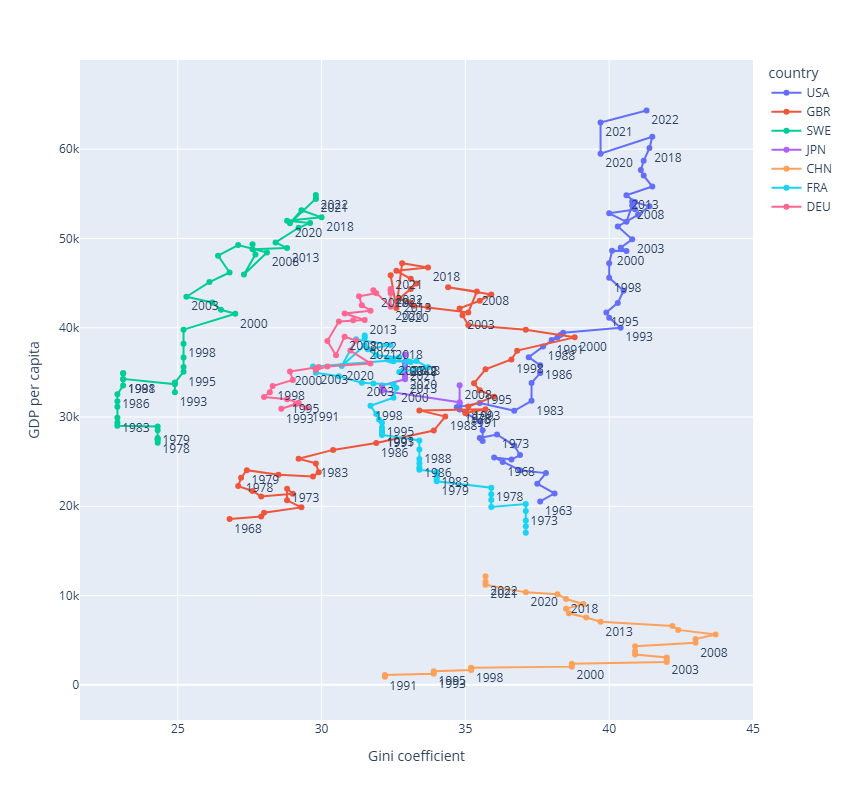

In [124]:
# plot GDP per capita on the y-axis and Gini on the x-axis:
fig = px.line(plot_data, 
              x = "gini", 
              y = "gdppc", 
              color = "country", 
              text = "year", 
              height = 800,
              labels = {"gini" : "Gini coefficient", "gdppc" : "GDP per capita"}
             )
fig.update_traces(textposition="bottom right")
fig.show()